In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'AMZN'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,1799.500000,1767.030029,1769.939941,1797.27002,6265600,1797.27002
2019-03-21,1823.750000,1787.280029,1796.260010,1819.26001,5767800,1819.26001
2019-03-22,1818.979980,1763.109985,1810.170044,1764.77002,6363000,1764.77002
2019-03-25,1782.680054,1747.500000,1757.790039,1774.26001,5103800,1774.26001
2019-03-26,1805.770020,1773.359985,1793.000000,1783.76001,4865900,1783.76001


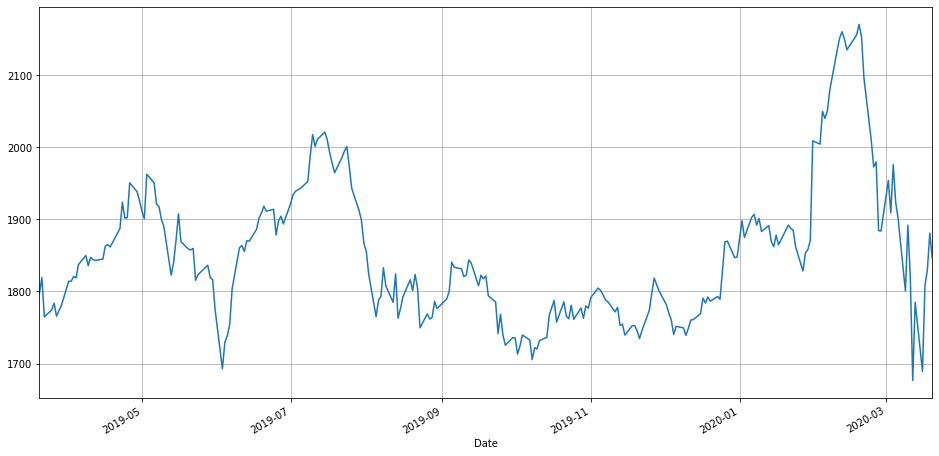

In [4]:
%matplotlib inline 
fig = plt.figure(figsize = (16,8))
data.Close.plot()
plt.grid()

In [5]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df

In [6]:
df2 = ROC(data, 10)

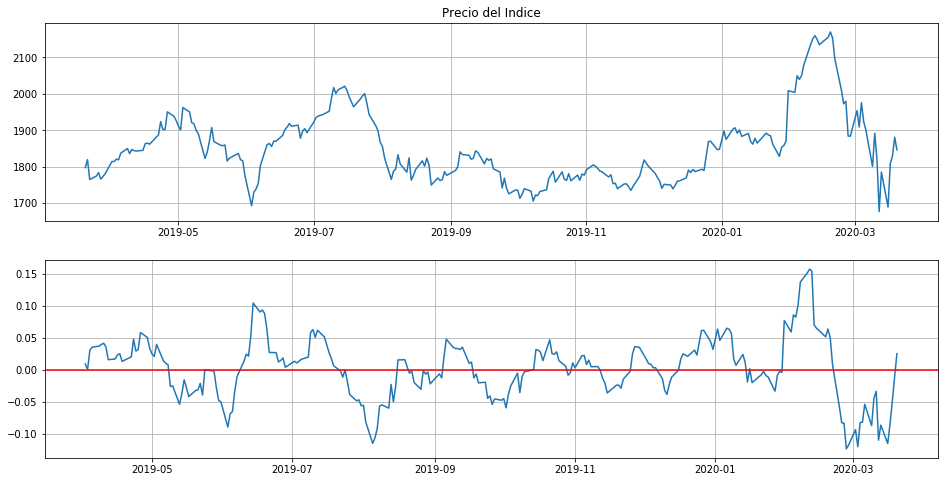

,Close,ROC_10,Recomendación
Date,,,
2019-05-09,1899.869995,-0.026022,Se recomienda VENDER la acción.
2019-05-24,1823.280029,0.000329,Se recomienda COMPRAR la acción.
2019-05-28,1836.430054,-0.002005,Se recomienda VENDER la acción. (DIV)
2019-06-10,1860.630005,0.013178,Se recomienda COMPRAR la acción.
2019-07-22,1985.630005,-0.001343,Se recomienda VENDER la acción. (DIV)
2019-08-16,1792.569946,0.015546,Se recomienda COMPRAR la acción.
2019-08-21,1823.540039,-0.005101,Se recomienda VENDER la acción. (DIV)
2019-09-05,1840.719971,0.019982,Se recomienda COMPRAR la acción.
2019-09-18,1817.459961,-0.012636,Se recomienda VENDER la acción.


In [7]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]
#df2[['Close', 'ROC_10', 'Recomendación']]